# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID") 


# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice.
study_data_complete ["Mouse ID"].unique()
len(study_data_complete ["Mouse ID"].unique())

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint 
import pandas as pd

#DataFrame
data = {'Mouse ID': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'Timepoint': [1, 1, 1, 2, 2, 2, 3, 3, 3],
        'Value': [10, 20, 30, 15, 25, 35, 12, 22, 32]}

df = pd.DataFrame(data)

# Set 'Mouse ID' and 'Timepoint' as the index
df.set_index(['Mouse ID', 'Timepoint'], inplace=True)

# Display the DataFrame with the new index
print("DataFrame with Unique Index:")
print(df)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data = {'Mouse ID': 'study_data_complete',
        'Timepoint': [1, 1, 1, 2, 2, 2, 3, 3, 3],
        'Value': [10, 20, 30, 15, 25, 35, 12, 22, 32]}

df = pd.DataFrame(data)

# Identify duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

DataFrame with Unique Index:
                    Value
Mouse ID Timepoint       
A        1             10
B        1             20
C        1             30
A        2             15
B        2             25
C        2             35
A        3             12
B        3             22
C        3             32
Duplicate Rows:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Prop

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc [study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Optional: Get all the data for the duplicate mouse ID. 
cleane_mouse_data = study_data_complete.loc [study_data_complete["Mouse ID"]!= "g989"]
cleane_mouse_data

# Drop duplicate rows based on 'Mouse ID'


# Display the clean DataFrame



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.

len(cleane_mouse_data ["Mouse ID"].unique())

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleane_mouse_mean = cleane_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
cleane_mouse_median = cleane_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() 
cleane_mouse_var = cleane_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
cleane_mouse_sem = cleane_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
cleane_mouse_sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics = cleane_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
)

# Display the summary statistics DataFrame
print(summary_statistics)
# Using the aggregation method, produce the same summary statistics in a single line


                   mean     median   variance       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot = cleane_mouse_data ["Drug Regimen"].value_counts()
plot

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

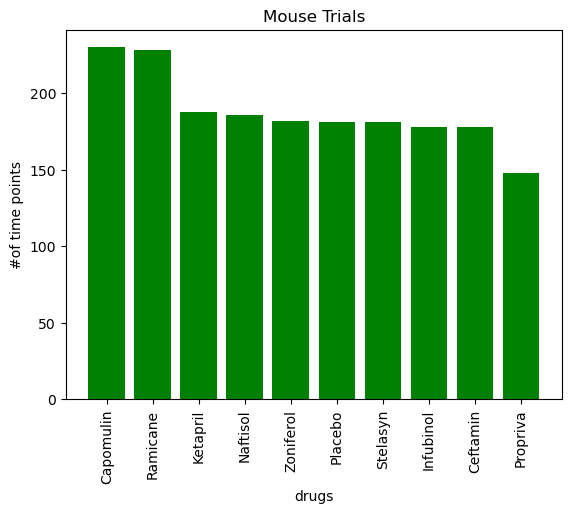

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(plot.index, plot.values, color = "green")
plt.xlabel("drugs")
plt.ylabel("#of time points")
plt.title("Mouse Trials")
plt.xticks(rotation = 90)
plt.show()

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
pylot 

<Axes: ylabel='count'>

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pylot = cleane_mouse_data["Sex"].value_counts()
pylot

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: ylabel='count'>

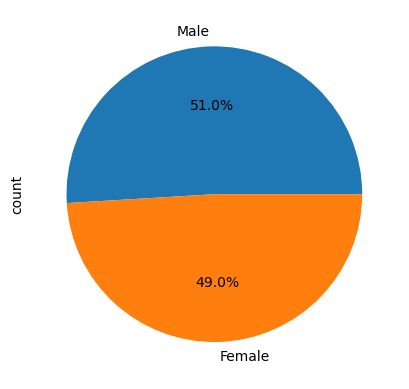

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
pylot = cleane_mouse_data["Sex"].value_counts() .plot(kind='pie',  autopct="%1.1f%%")
pylot

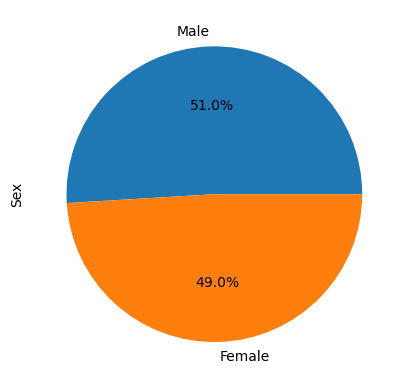

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
plt.pie(cleane_mouse_data["Sex"].value_counts().values, labels = cleane_mouse_data["Sex"].value_counts().index,  autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

mouse_timepoint = cleane_mouse_data[cleane_mouse_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_timepoint = mouse_timepoint.sort_values(["Timepoint"], ascending=True)
mouse_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
both_dataframe = mouse_timepoint.merge(cleane_mouse_data, on = ('Mouse ID', 'Timepoint'), how = 'left' )
both_dataframe

regimes_data = mouse_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [61]:
regimes_data.shape


(814, 4)

In [63]:
# Put treatments into a list for for loop (and later for plot labels)

# Selecting individual row by index
capomulin_data = cleane_mouse_data.loc[cleane_mouse_data["Drug Regimen"] == "Capomulin",:]
ramicane_data = cleane_mouse_data.loc[cleane_mouse_data["Drug Regimen"] == "Ramicane", :]
infubinol_data = cleane_mouse_data.loc[cleane_mouse_data["Drug Regimen"] == "Infubinol", :]
ceftamin_data = cleane_mouse_data.loc[cleane_mouse_data["Drug Regimen"] == "Ceftamin", :]
capomulin_data

#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_last = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_last
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_vol
capomulin_merge = capomulin_vol.merge(cleane_mouse_data, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#tuvol = capomulin_merge['Tumor Volume (mm3)']
#quartiles = tuvol.quantile([0.25,0.5,0.75])
#capomulin_lowerq = quartiles[0.25]
#capomulin_upperq = quartiles[0.75]
#capomulin_iqr = capomulin_upperq - capomulin_lowerq
#print(f' IQR = {capomulin_iqr}')
#print(f' Lower Quartile = {capomulin_lowerq}')
#print(f' Upper Quartile = {capomulin_upperq}')
#capomulin_lower_bound = capomulin_lowerq - 1.5*capomulin_iqr
#capomulin_upper_bound = capomulin_upperq + 1.5*capomulin_iqr
#print(f' Lower Bound: {capomulin_lower_bound}')
#print(f' Upper Bound: {capomulin_upper_bound}')
#capomulin_merge.describe()
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
treatments = regimes_data["Drug Regimen"].unique()
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
t_volume_data_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in regimen:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = regimes_data["Drug Regimen"]== treatment
    tumor_volume = regimes_data.loc[quartiles, "Tumor Volume (mm3)"]
    t_volume_data_list.append(tumor_volume)
    quartiles
    # Determine outliers using upper and lower bounds
    quartiles =tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = tumor_volume.where((tumor_volume < lower_bound) | (tumor_volume > upper_bound))
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(outliers)
    


    
    # Determine outliers using upper and lower bounds


Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.
1370   NaN
1251   NaN
1153   NaN
1123   NaN
1398   NaN
        ..
1132   NaN
1162   NaN
1033   NaN
1670   NaN
993    NaN
Name: Tumor Volume (mm3), Length: 178, dtype: float64


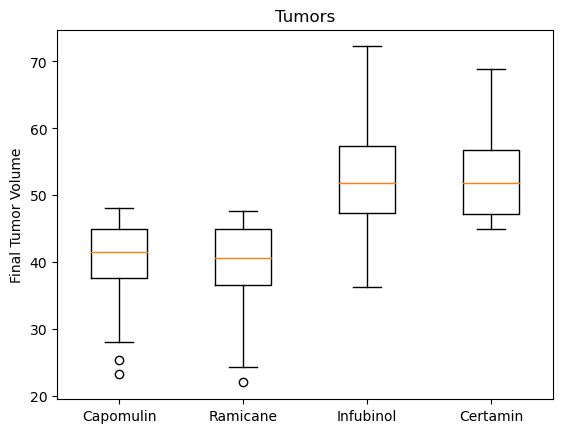

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.________IMAGE HERE


plt.boxplot(t_volume_data_list, labels = ["Capomulin", "Ramicane", "Infubinol", "Certamin"])
plt.title("Tumors")
plt.ylabel("Final Tumor Volume")
plt.show()


## Line and Scatter Plots

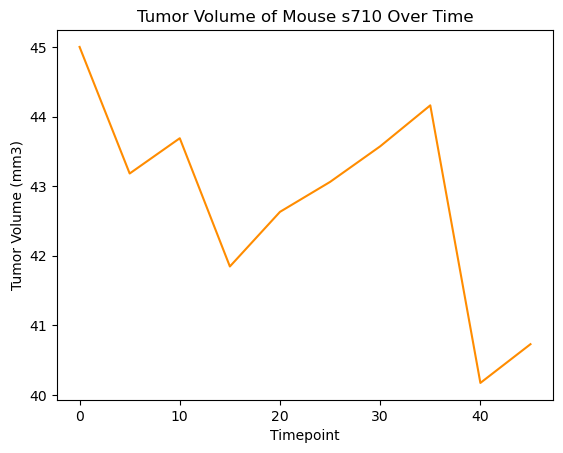

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin _____IMAGE HERE
line_plot = cleane_mouse_data.loc[(cleane_mouse_data["Mouse ID"] == "s710")]
line_plot = line_plot.set_index("Timepoint")
line_plot

#Final plot
line_plot["Tumor Volume (mm3)"].plot(color = "darkorange")
plt.title("Tumor Volume of Mouse s710 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [78]:
scatter_plot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0.5, 1.0, 'Weight Versus Average Tumor Volume for Capomulin')

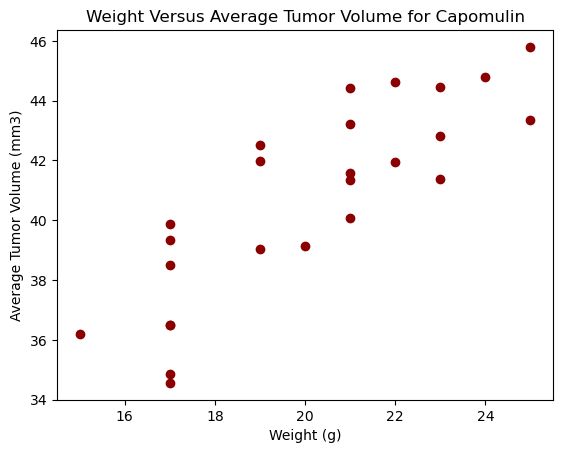

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter_plot = cleane_mouse_data.loc[(cleane_mouse_data["Drug Regimen"] == "Capomulin")]
scatter_plot

scatter_plot_df = scatter_plot[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]].groupby(["Mouse ID"]).mean()

scatter_plot_df

# set x and y value
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "darkred")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Versus Average Tumor Volume for Capomulin")

## Correlation and Regression

In [83]:
# Calculate the correlation coefficient and a linear regression model 
slope, intercept, r_value , p_value, std_err = st.linregress(weight_scatter_plot, volume_scatter_plot)
y_value = slope * weight_scatter_plot + intercept


print(f'The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight_scatter_plot, volume_scatter_plot)[0],2)}') 

# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation coefficient between weight and tumor volume is 0.84
